In [ ]:
# import argparse

# import numpy as np
# import os
# import mne

# parser = argparse.ArgumentParser(description="Template")

# parser.add_argument('-ed', '--eeg-dataset', default=r".\datasets\tuab", help="EEG dataset path")
# opt, unknown = parser.parse_known_args()

# subsets = ['train', 'eval']
# classes = ['normal', 'abnormal']

# time = 0.5

# for subset_i in subsets:
#     for class_i in classes:
#         path = opt.eeg_dataset + rf'.\tuh_eeg_abnormal\v3.0.1\edf\{subset_i}\{class_i}\01_tcp_ar'
#         path_resampled = path.replace('tuab', 'tuab_resampled')

#         for file_name in os.listdir(path):
#             if file_name.split('.')[-1] != 'edf':
#                 continue

#             file_path = path + '\\' + file_name
#             file_path_resampled = path_resampled + '\\' + file_name

#             data = mne.io.read_raw_edf(file_path, verbose=False)
#             ch_names = data.info.ch_names
#             sfreq = data.info["sfreq"]
#             step = int(sfreq * time)

#             # Находим каналы
#             indices = [index for index, element in enumerate(ch_names) if element in top_chans]
#             raw = data.get_data()[indices, :]

#             # Заполняем недостающие каналы
#             indices = [index for index, element in enumerate(top_chans) if element not in ch_names]
#             for index in indices:
#                 raw = np.insert(raw, index, np.zeros(raw.shape[1]), axis=0)

#             # Семплирование и разбиение
#             for i in range(int(raw.shape[1] / step)):
#                 raw_i = raw[:, i*step:(i + 1)*step]

#                 if raw_i.shape[1] != step:
#                     continue

#                 if sfreq < 500:
#                     raw_i = mne.filter.resample(raw_i, up=500/sfreq, down=1)
#                 else:
#                     raw_i = mne.filter.resample(raw_i, up=1, down=sfreq/500)

#                 # Сохранение в файл
#                 n_channels = len(top_chans)  # Количество каналов
#                 n_times = raw_i.shape[1]  # Количество временных точек
#                 ch_names = top_chans
#                 ch_types = ['eeg'] * n_channels   # Типы каналов

#                 info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
#                 raw_to_save = mne.io.RawArray(raw_i, info)

#                 os.makedirs(path, exist_ok=True)    
#                 mne.export.export_raw('.'.join(file_path_resampled.split('.')[:-1]) + f'_{i + 1}' + '.edf', raw_to_save, fmt='edf', overwrite=True)
            
#             exit(0)

In [102]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mne

## Семплирование сигнала

In [104]:
with open('..\\datasets\\tuab\\top_chans.txt', 'r') as f:
    top_chans = [line[:-1] for line in f.readlines()]

In [105]:
len(top_chans)

23

In [158]:
time = 0.5
start_index = 10000
end_index = -1000

path = rf'..\datasets\tuab\tuh_eeg_abnormal\v3.0.1\edf\train\normal\01_tcp_ar'
file_path = path + '\\' + os.listdir(path)[1]

data = mne.io.read_raw_edf(file_path, verbose=False)
ch_names = data.info.ch_names
sfreq = data.info["sfreq"]
step = int(sfreq * time)

# Находим каналы
indices = [index for index, element in enumerate(ch_names) if element in top_chans]
raw = data.get_data()[indices, start_index:end_index]

# # Заполняем недостающие каналы
# indices = [index for index, element in enumerate(top_chans) if element not in ch_names]
# for index in indices:
#     raw = np.insert(raw, index, np.zeros(raw.shape[1]), axis=0)

# Семплирование и разбиение
for i in range(int(raw.shape[1] / step)):
    raw_i = raw[:, i*step:(i + 1)*step]

    if raw_i.shape[1] != step:
        continue

    if sfreq < 500:
        raw_j = mne.filter.resample(raw_i, up=500/sfreq, down=1)
    else:
        raw_j = mne.filter.resample(raw_i, up=1, down=sfreq/500)
    
    break

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw_i[0].shape[0]), raw_i[0], label='origin');
plt.plot(np.linspace(0, 0.5, raw_j[0].shape[0]), raw_j[0], label='sampled');
plt.legend()

In [ ]:
file_path1 = '../datasets/tuab_resampled/tuh_eeg_abnormal/v3.0.1/edf/train/normal/01_tcp_ar/aaaaaaav_s004_t000_2400.edf'
file_path2 = '../datasets/tuab_resampled/tuh_eeg_abnormal/v3.0.1/edf/train/normal/01_tcp_ar/aaaaaaav_s004_t000_2401.edf'
file_path3 = '../datasets/tuab_resampled/tuh_eeg_abnormal/v3.0.1/edf/train/normal/01_tcp_ar/aaaaaabn_s005_t000_67.edf'

data = mne.io.read_raw_edf(file_path1, verbose=False)
raw1 = data.get_data()
data = mne.io.read_raw_edf(file_path2, verbose=False)
raw2 = data.get_data()
data = mne.io.read_raw_edf(file_path3, verbose=False)
raw3 = data.get_data()
plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw1[0].shape[0]), raw1[0], label='sampled-1');
plt.legend()

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw2[0].shape[0]), raw2[0], label='sampled-2');
plt.legend()

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(0, 0.5, raw3[0].shape[0]), raw3[0], label='sampled-3');
plt.legend()

## Обрезка сигнала

Train:
- normal: start-10000, end-1000
- abnormal: start-10000, end-1000

Eval:
- normal: start-10000, end-1000
- abnormal: start-10000, end-1000

In [ ]:
# Подсчет данных
path = rf'..\datasets\tuab\tuh_eeg_abnormal\v3.0.1\edf\eval\abnormal\01_tcp_ar'
df_start = pd.DataFrame({'time': [], 'data':[]})
df_end = pd.DataFrame({'time': [], 'data':[]})

for file_name in os.listdir(path):
    if file_name.split('.')[-1] == 'edf':
        file_path = path + '\\' + file_name

        data = mne.io.read_raw_edf(file_path, verbose=False)
        nchans = len(data.info.ch_names)
        data = data.get_data()
        df_start = pd.concat([df_start, pd.DataFrame({'time': range(20000), 'data': data[0][:20000]})])
        df_end = pd.concat([df_end, pd.DataFrame({'time': range(20000), 'data': data[0][-20000:]})])

Train-normal

(-5e-05, 5e-05)

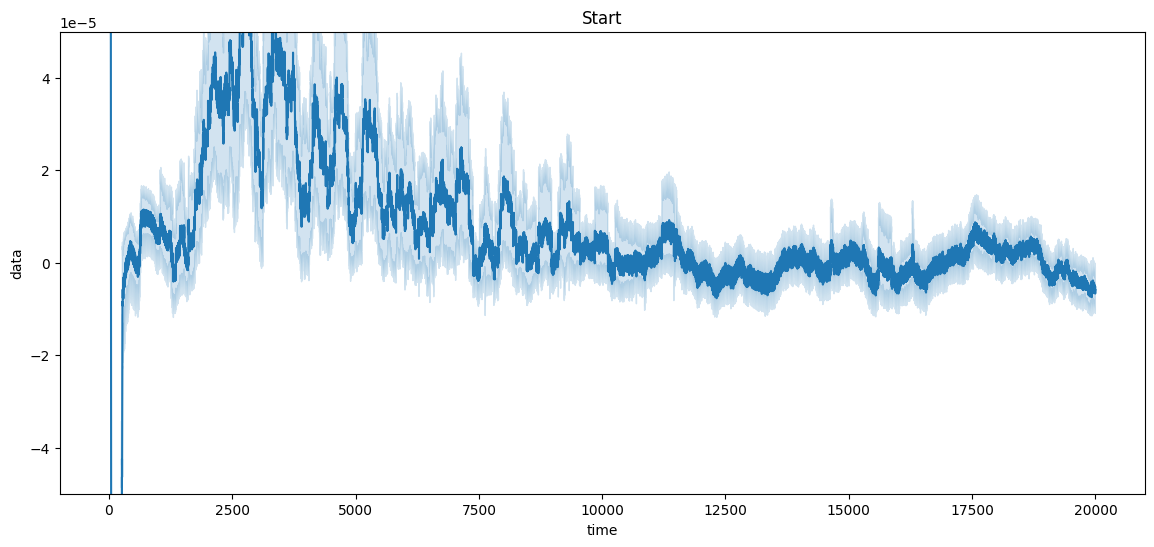

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_start, x='time', y='data').set_title("Start")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

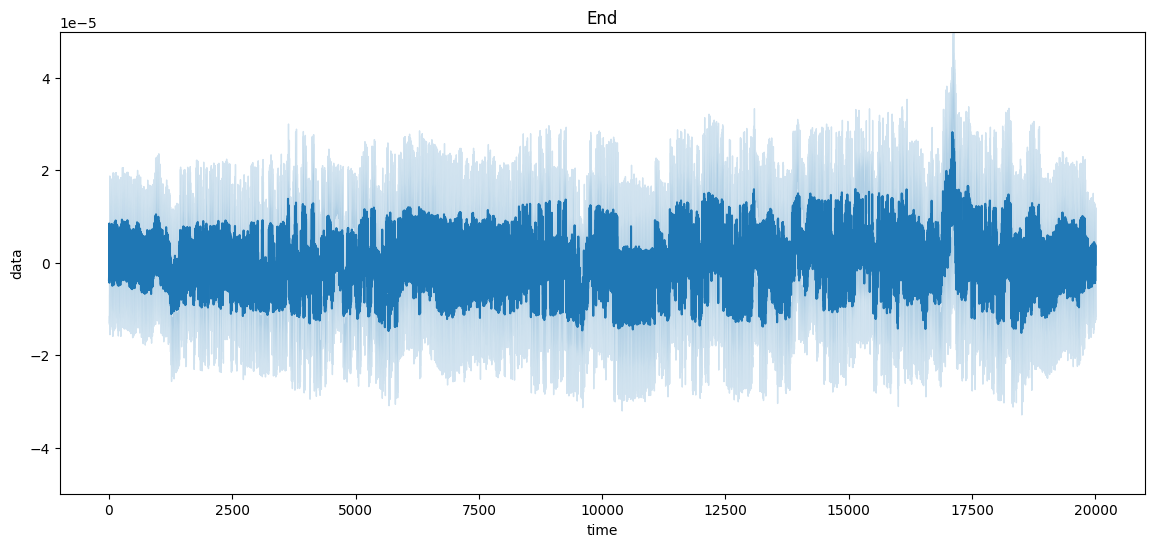

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end, x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

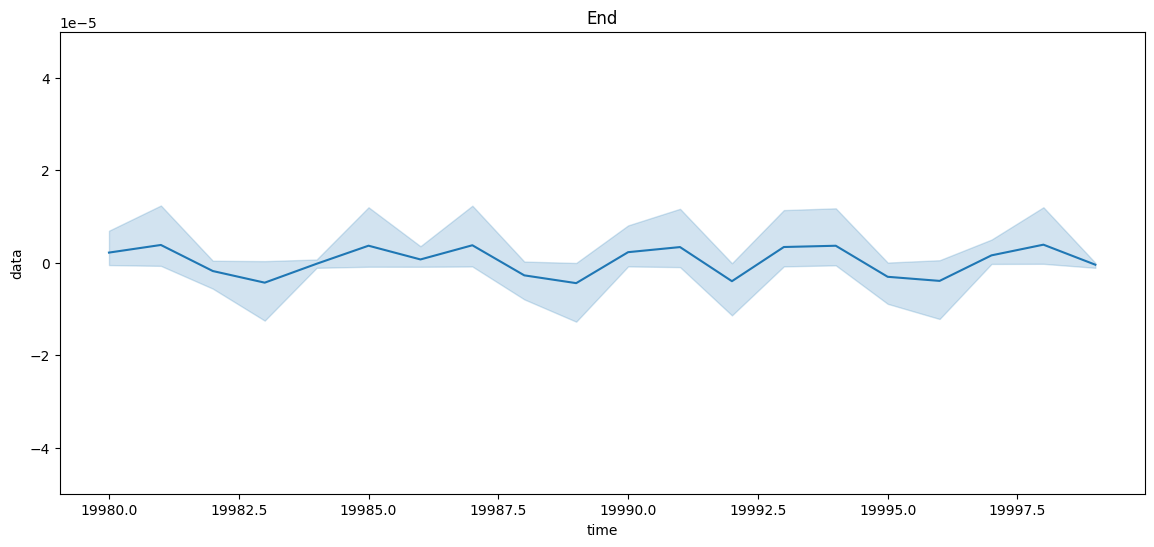

In [76]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end.sort_values(by='time').tail(int(27420000/1000)), x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

Train-abnormal

(-5e-05, 5e-05)

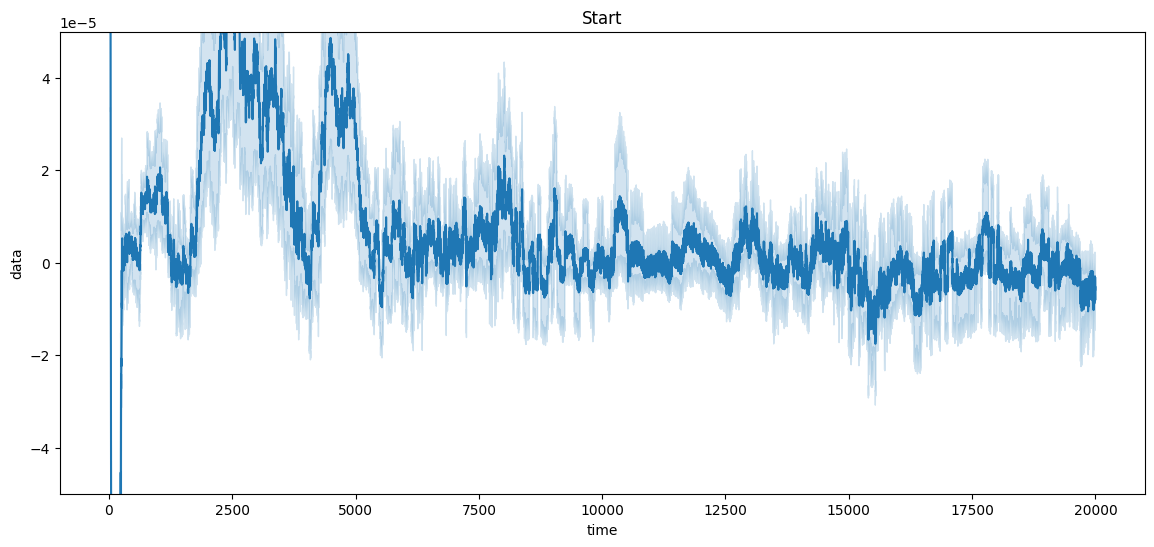

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_start, x='time', y='data').set_title("Start")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

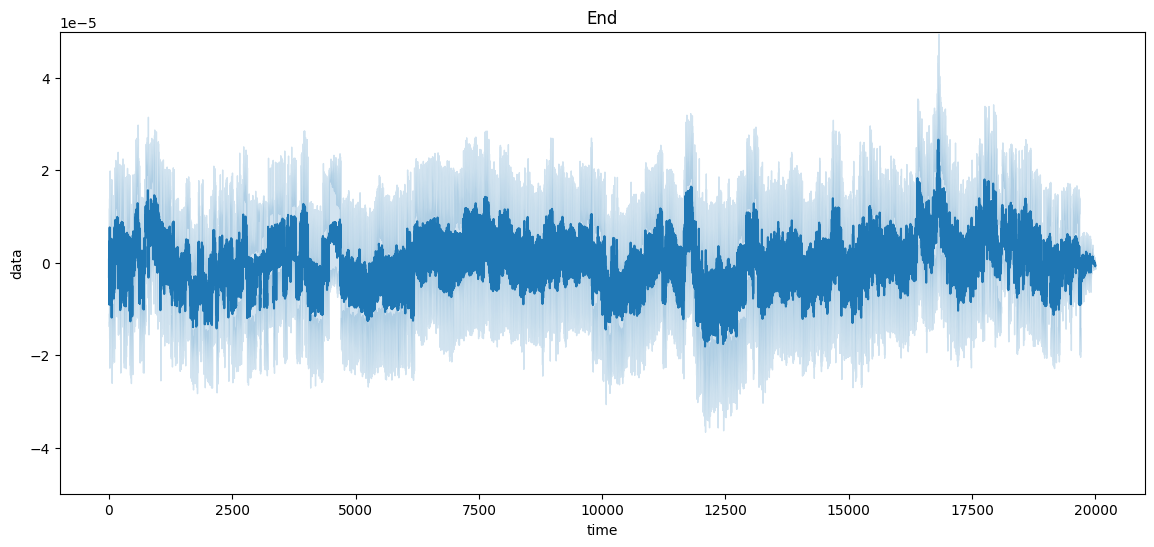

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end, x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

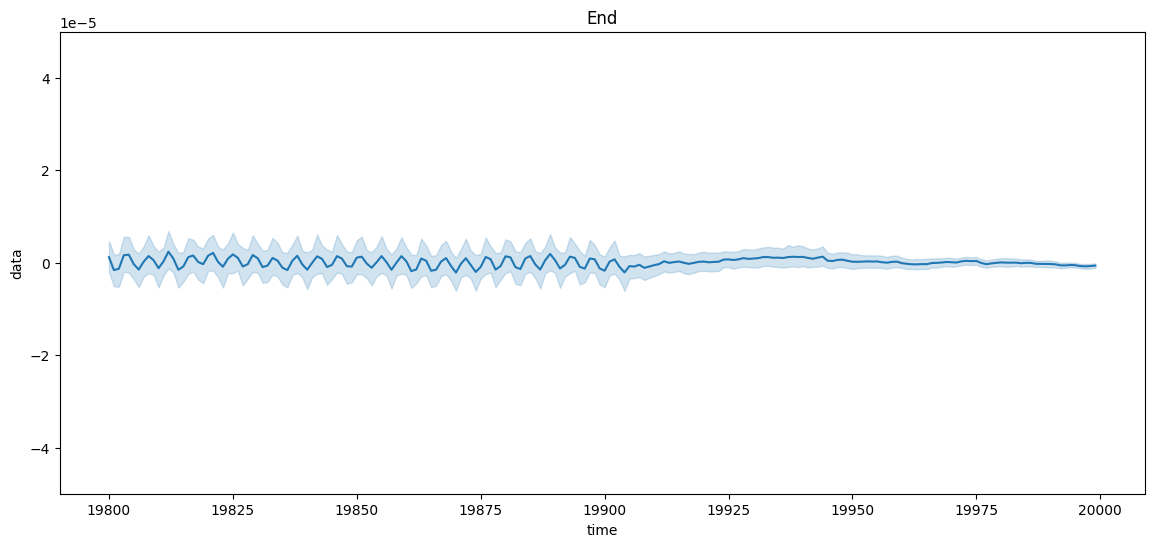

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end.sort_values(by='time').tail(int(26920000/100)), x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

Eval-normal

(-5e-05, 5e-05)

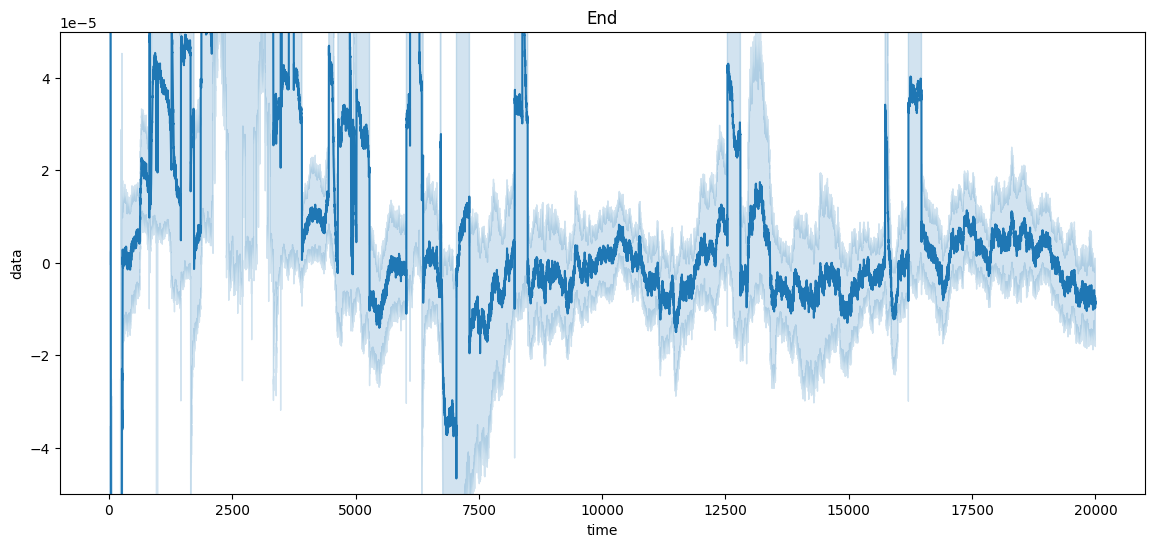

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_start, x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

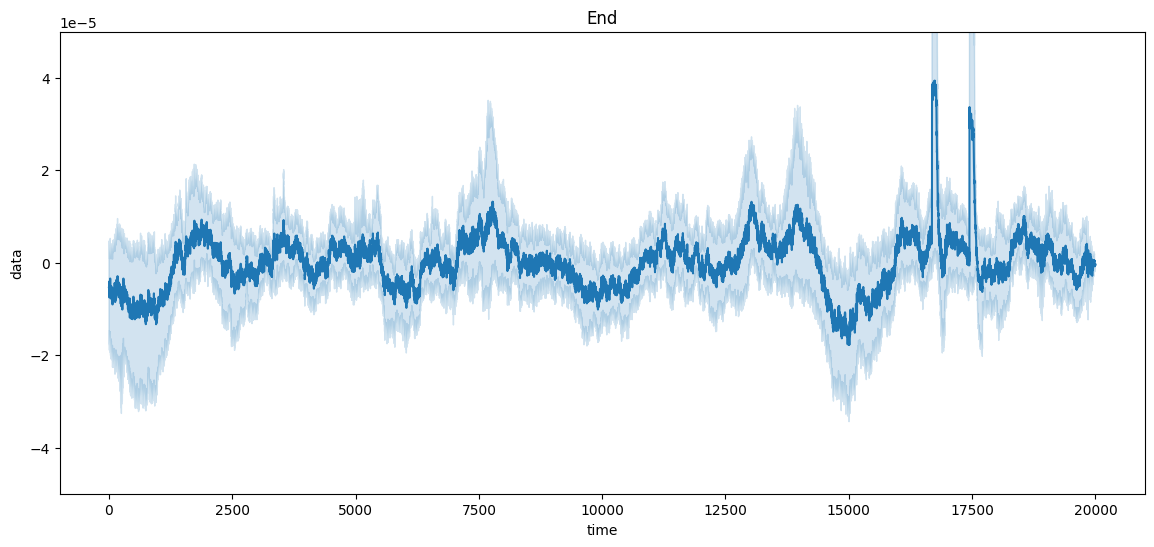

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end, x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

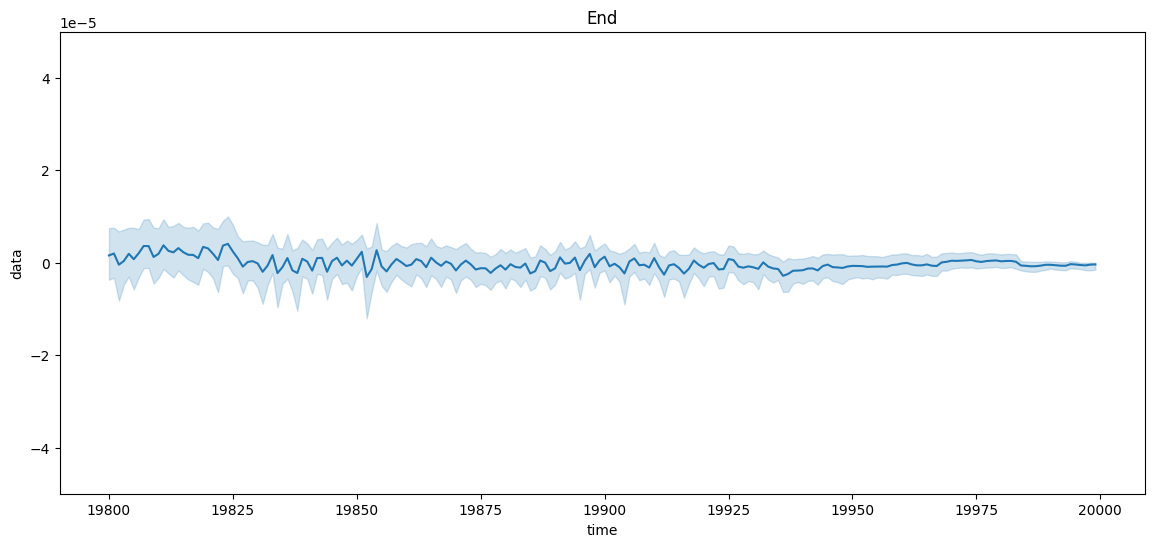

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end.sort_values(by='time').tail(int(3000000 /100)), x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

Eval-abnormal

(-5e-05, 5e-05)

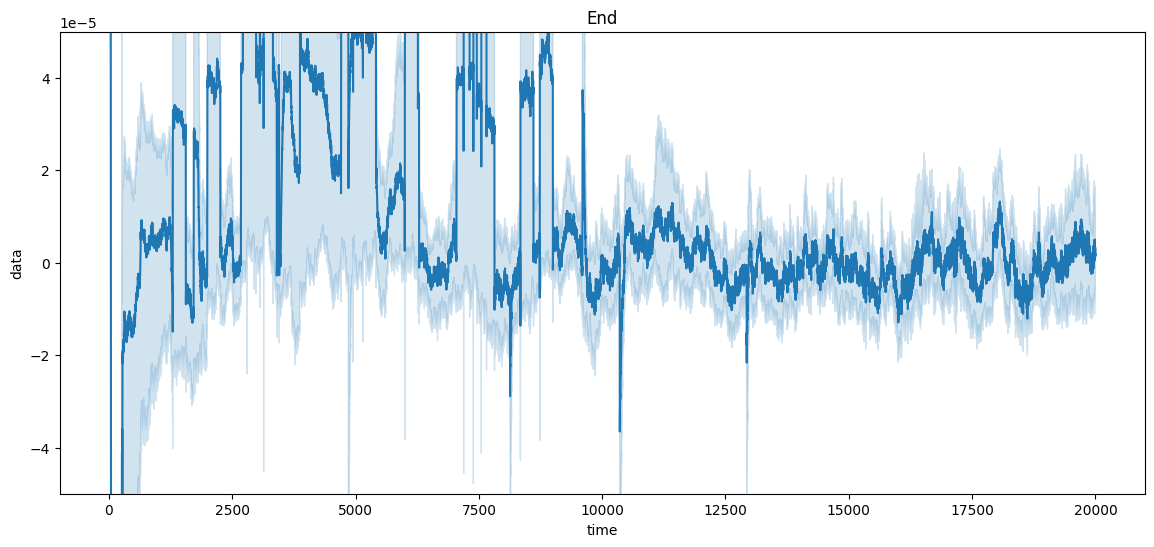

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_start, x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

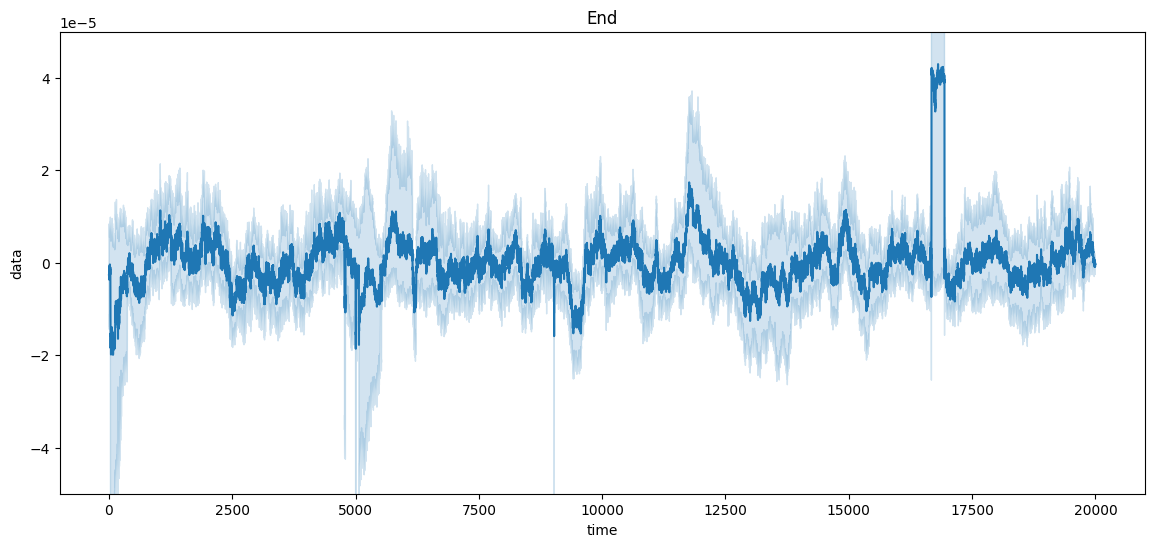

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end, x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))

(-5e-05, 5e-05)

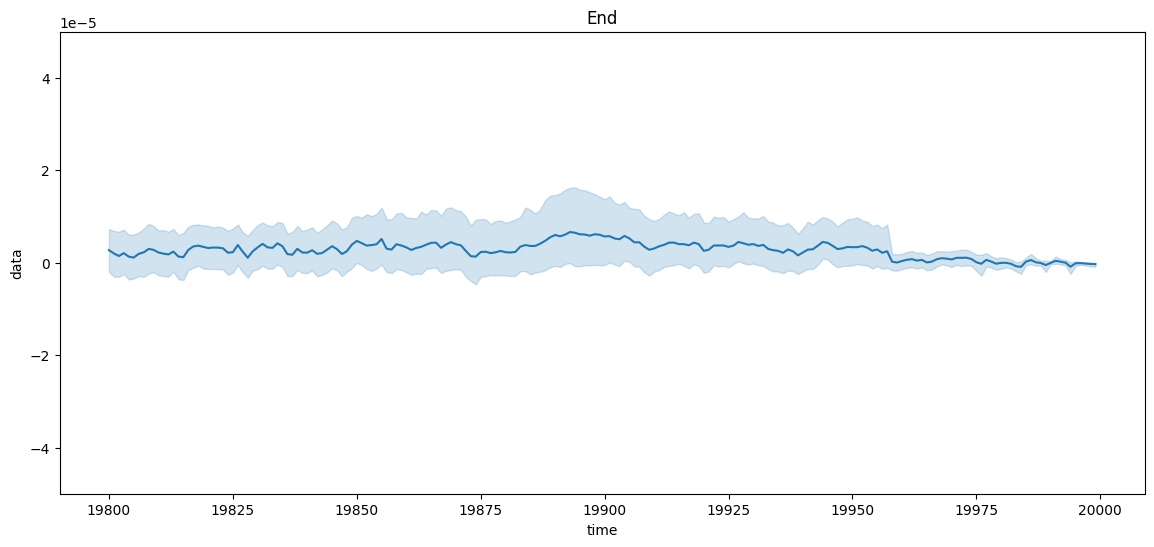

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_end.sort_values(by='time').tail(int(2520000 / 100)), x='time', y='data').set_title("End")
plt.ylim((-5*10**(-5), 5*10**(-5)))